In [78]:
#import libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing

In [79]:
#reading data 
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [80]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [81]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [82]:
df.shape

(25, 2)

In [83]:
import plotly.express as px

fig = px.scatter(df, x="Hours", y="Scores", title='hours vs scores')
fig.show()
#from the graph below , its clear that there is a linear trend to it 
#there are no visible outliers 

In [84]:
missing_values=df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame



,missing_values,percent_missing %
Hours,0,0.0
Scores,0,0.0


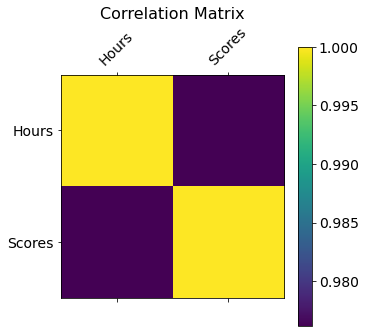

In [85]:
f = plt.figure(figsize=(5, 5))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
#high correlation is seen here 

In [86]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['Hours','Scores'])

In [87]:
scaled_df

,Hours,Scores
0,0.172840,0.051282
1,0.493827,0.384615
2,0.259259,0.128205
3,0.913580,0.743590
4,0.296296,0.166667
5,0.049383,0.038462
6,1.000000,0.910256
7,0.543210,0.551282
8,0.888889,0.820513
9,0.197531,0.102564


In [88]:
X = scaled_df.iloc[:, :-1].values  
y = scaled_df.iloc[:, 1].values  

In [89]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [90]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)



LinearRegression(normalize=True)

In [91]:
#ine = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
#lt.scatter(X, y)
#plt.plot(X, line);
#plt.show()

In [92]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [93]:
pred = lin_reg.predict(X_test)

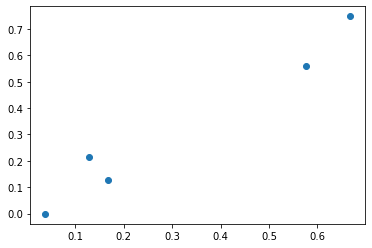

In [94]:
plt.scatter(y_test, pred)

In [95]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.053639229474397164
MSE: 0.0035500935744933273
RMSE: 0.05958266169359445
R2 Square 0.9454906892105355
Train set evaluation:
_____________________________________
MAE: 0.06649489370744063
MSE: 0.005078596708960304
RMSE: 0.07126427372085051
R2 Square 0.9515510725211553


In [96]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df1

,Actual,Predicted
0,0.038462,-0.001485
1,0.128205,0.214516
2,0.666667,0.748167
3,0.166667,0.125574
4,0.576923,0.557577


In [97]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.05363922947439714
MSE: 0.0035500935744933264
RMSE: 0.05958266169359444
R2 Square 0.9454906892105355
Train set evaluation:
_____________________________________
MAE: 0.06649489370744063
MSE: 0.005078596708960305
RMSE: 0.07126427372085051
R2 Square 0.9515510725211553


In [98]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,MAE,MSE,RMSE,R2 Square,Cross Validation,Model
0,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
1,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
2,9.166561,108.018867,10.393213,0.727390,0.605323,NaN
3,4.164632,21.474543,4.634063,0.945804,0.590013,NaN
4,4.147557,21.366930,4.622438,0.946076,0.466608,NaN
5,4.263422,22.554151,4.749121,0.943080,0.000000,NaN
6,4.279863,21.777403,4.666627,0.945040,0.000000,NaN
7,6.937888,78.948259,8.885283,0.800756,0.000000,NaN
8,6.751323,61.110924,7.817348,0.845773,0.000000,NaN
9,6.751323,61.110924,7.817348,0.845773,0.000000,NaN


In [99]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.27146786142158763
MSE: 0.08679401076497412
RMSE: 0.2946082326836338
R2 Square -0.33266394481653183
Train set evaluation:
_____________________________________
MAE: 0.28666378655419084
MSE: 0.10117011309596516
RMSE: 0.3180724966040999
R2 Square 0.03485475352572587


In [100]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,MAE,MSE,RMSE,R2 Square,Cross Validation,Model
0,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
1,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
2,9.166561,108.018867,10.393213,0.727390,0.605323,NaN
3,4.164632,21.474543,4.634063,0.945804,0.590013,NaN
4,4.147557,21.366930,4.622438,0.946076,0.466608,NaN
5,4.263422,22.554151,4.749121,0.943080,0.000000,NaN
6,4.279863,21.777403,4.666627,0.945040,0.000000,NaN
7,6.937888,78.948259,8.885283,0.800756,0.000000,NaN
8,6.751323,61.110924,7.817348,0.845773,0.000000,NaN
9,6.751323,61.110924,7.817348,0.845773,0.000000,NaN


In [101]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.2767948717948718
MSE: 0.09019764957264957
RMSE: 0.30032923529461725
R2 Square -0.3849245406824149
Train set evaluation:
_____________________________________
MAE: 0.29166666666666663
MSE: 0.10482371794871792
RMSE: 0.32376491154650766
R2 Square 0.0


In [102]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,MAE,MSE,RMSE,R2 Square,Cross Validation,Model
0,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
1,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
2,9.166561,108.018867,10.393213,0.727390,0.605323,NaN
3,4.164632,21.474543,4.634063,0.945804,0.590013,NaN
4,4.147557,21.366930,4.622438,0.946076,0.466608,NaN
5,4.263422,22.554151,4.749121,0.943080,0.000000,NaN
6,4.279863,21.777403,4.666627,0.945040,0.000000,NaN
7,6.937888,78.948259,8.885283,0.800756,0.000000,NaN
8,6.751323,61.110924,7.817348,0.845773,0.000000,NaN
9,6.751323,61.110924,7.817348,0.845773,0.000000,NaN


In [103]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.2582029991127219
MSE: 0.0786134986876773
RMSE: 0.28038098845620274
R2 Square -0.20705765701551782
Train set evaluation:
_____________________________________
MAE: 0.2742060454969227
MSE: 0.09236844202335145
RMSE: 0.3039217695778824
R2 Square 0.11882116155677547


In [104]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,MAE,MSE,RMSE,R2 Square,Cross Validation,Model
0,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
1,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
2,9.166561,108.018867,10.393213,0.727390,0.605323,NaN
3,4.164632,21.474543,4.634063,0.945804,0.590013,NaN
4,4.147557,21.366930,4.622438,0.946076,0.466608,NaN
5,4.263422,22.554151,4.749121,0.943080,0.000000,NaN
6,4.279863,21.777403,4.666627,0.945040,0.000000,NaN
7,6.937888,78.948259,8.885283,0.800756,0.000000,NaN
8,6.751323,61.110924,7.817348,0.845773,0.000000,NaN
9,6.751323,61.110924,7.817348,0.845773,0.000000,NaN


In [105]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.05465925153794171
MSE: 0.003707125361263429
RMSE: 0.06088616724070771
R2 Square 0.9430795712246953
Train set evaluation:
_____________________________________
MAE: 0.0665284116714463
MSE: 0.005069213906112912
RMSE: 0.07119841224432545
R2 Square 0.951640582825035


In [106]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,MAE,MSE,RMSE,R2 Square,Cross Validation,Model
0,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
1,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
2,9.166561,108.018867,10.393213,0.727390,0.605323,NaN
3,4.164632,21.474543,4.634063,0.945804,0.590013,NaN
4,4.147557,21.366930,4.622438,0.946076,0.466608,NaN
5,4.263422,22.554151,4.749121,0.943080,0.000000,NaN
6,4.279863,21.777403,4.666627,0.945040,0.000000,NaN
7,6.937888,78.948259,8.885283,0.800756,0.000000,NaN
8,6.751323,61.110924,7.817348,0.845773,0.000000,NaN
9,6.751323,61.110924,7.817348,0.845773,0.000000,NaN


In [107]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.27017130200766737
MSE: 0.13465530340748372
RMSE: 0.36695408896411513
R2 Square -1.0675420601936478
Train set evaluation:
_____________________________________
MAE: 0.42843555260281485
MSE: 0.2803965035071545
RMSE: 0.5295247902668528
R2 Square -1.6749337744758366


In [108]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,MAE,MSE,RMSE,R2 Square,Cross Validation,Model
0,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
1,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
2,9.166561,108.018867,10.393213,0.727390,0.605323,NaN
3,4.164632,21.474543,4.634063,0.945804,0.590013,NaN
4,4.147557,21.366930,4.622438,0.946076,0.466608,NaN
5,4.263422,22.554151,4.749121,0.943080,0.000000,NaN
6,4.279863,21.777403,4.666627,0.945040,0.000000,NaN
7,6.937888,78.948259,8.885283,0.800756,0.000000,NaN
8,6.751323,61.110924,7.817348,0.845773,0.000000,NaN
9,6.751323,61.110924,7.817348,0.845773,0.000000,NaN


In [109]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.08930491452991439
MSE: 0.012896948709959008
RMSE: 0.11356473356618686
R2 Square 0.8019759843746451
Train set evaluation:
_____________________________________
MAE: 0.027797489316239855
MSE: 0.0009952459315420849
RMSE: 0.03154751862733557
R2 Square 0.9905055272698019


In [110]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,MAE,MSE,RMSE,R2 Square,Cross Validation,Model
0,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
1,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
2,9.166561,108.018867,10.393213,0.727390,0.605323,NaN
3,4.164632,21.474543,4.634063,0.945804,0.590013,NaN
4,4.147557,21.366930,4.622438,0.946076,0.466608,NaN
5,4.263422,22.554151,4.749121,0.943080,0.000000,NaN
6,4.279863,21.777403,4.666627,0.945040,0.000000,NaN
7,6.937888,78.948259,8.885283,0.800756,0.000000,NaN
8,6.751323,61.110924,7.817348,0.845773,0.000000,NaN
9,6.751323,61.110924,7.817348,0.845773,0.000000,NaN


In [111]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.1712204653975848
MSE: 0.041265731286775464
RMSE: 0.2031396841751396
R2 Square 0.3663923148880932
Train set evaluation:
_____________________________________
MAE: 0.03792378430855423
MSE: 0.002834297844391693
RMSE: 0.053238123975133576
R2 Square 0.9729612925408895


In [112]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,MAE,MSE,RMSE,R2 Square,Cross Validation,Model
0,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
1,4.183860,21.598769,4.647448,0.945491,0.615166,NaN
2,9.166561,108.018867,10.393213,0.727390,0.605323,NaN
3,4.164632,21.474543,4.634063,0.945804,0.590013,NaN
4,4.147557,21.366930,4.622438,0.946076,0.466608,NaN
5,4.263422,22.554151,4.749121,0.943080,0.000000,NaN
6,4.279863,21.777403,4.666627,0.945040,0.000000,NaN
7,6.937888,78.948259,8.885283,0.800756,0.000000,NaN
8,6.751323,61.110924,7.817348,0.845773,0.000000,NaN
9,6.751323,61.110924,7.817348,0.845773,0.000000,NaN


<AxesSubplot:ylabel='Model'>

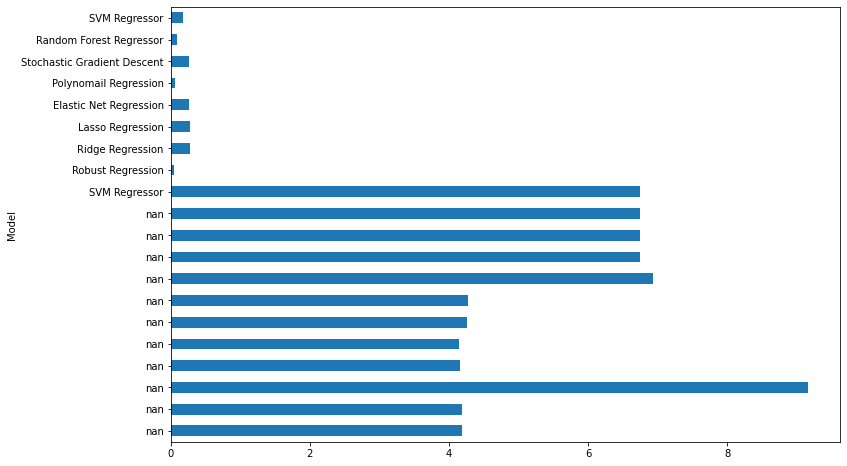

In [113]:
results_df.set_index('Model', inplace=True)
results_df['MAE'].plot(kind='barh', figsize=(12, 8))